Best alpha: 0.0061
Best R² value: 0.9999824100620837


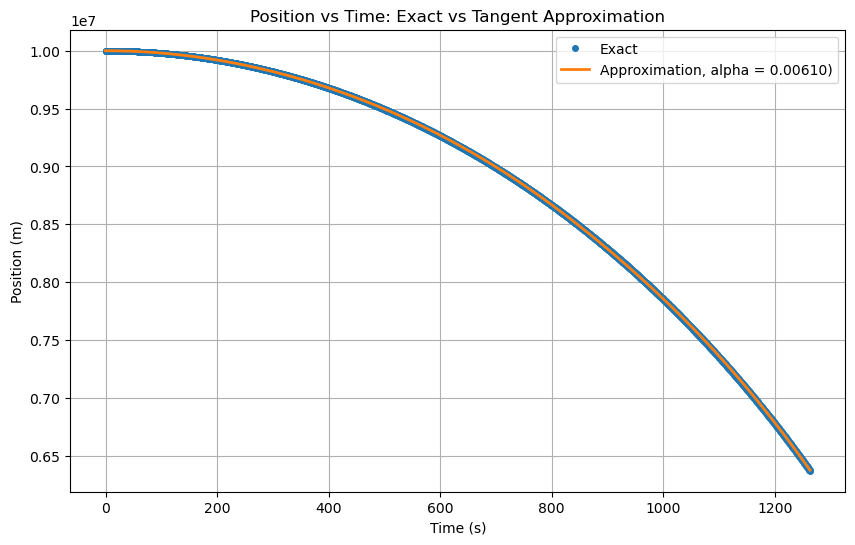

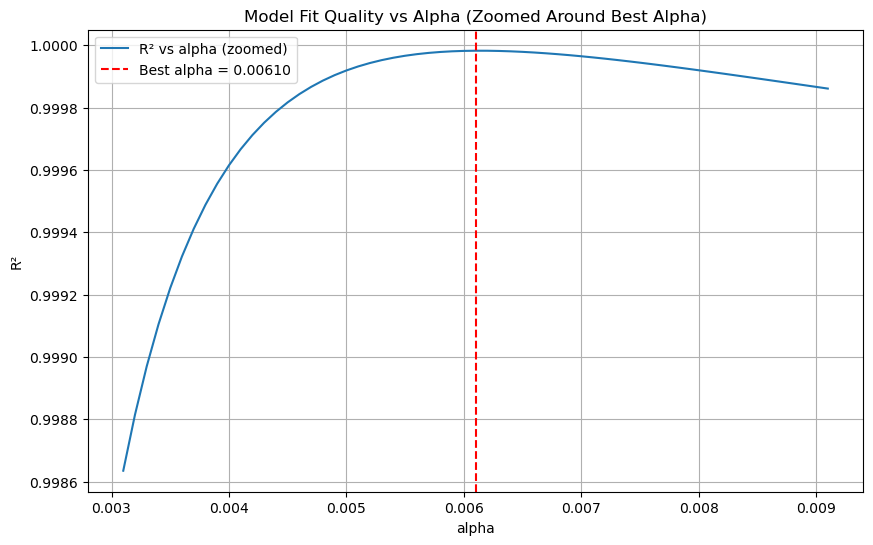

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Constants
G = 6.6743e-11  # gravitational constant
M = 5.97219e24  # mass of Earth
r1 = 1e7        # initial radius
r2 = 6371000    # Earth radius
tc = 915

# Load CSV data
data = pd.read_csv('NumericalData.csv')
t_data = data['Time'].values
x_data = data['Position'].values

# Model function
def position_model(t, alpha):
    # First region
    x1 = -0.5 * G * M / r1**2 * t**2 + 0 * t + r1
    # Second region
    x2 = -0.5 * G * M / r2**2 * t**2 + 5661.39 * t + 7050680
    # Smooth transition using tanh
    weight = np.tanh(alpha * (t - tc))
    return x1 * (1 - weight) / 2 + x2 * (1 + weight) / 2

# Alpha range
alphas = np.arange(0.0, 1.0, 0.0001)
r2_scores = []

# Evaluate model for each alpha
for alpha in alphas:
    x_pred = position_model(t_data, alpha)
    rsquared = r2_score(x_data, x_pred)
    r2_scores.append(rsquared)

# Find best alpha
best_index = np.argmax(r2_scores)
best_alpha = alphas[best_index]
best_r2 = r2_scores[best_index]

print(f"Best alpha: {best_alpha}")
print(f"Best R² value: {best_r2}")

# Plot position vs. time comparison
x_best_fit = position_model(t_data, best_alpha)

plt.figure(figsize=(10, 6))
plt.plot(t_data, x_data, 'o', markersize=4, label='Exact')
plt.plot(t_data, x_best_fit, '-', linewidth=2, label=f'Approximation, alpha = {best_alpha:.5f})')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position vs Time: Exact vs Tangent Approximation')
plt.legend()
plt.grid(True)
plt.show()

# Determine zoom range around best alpha (±100%)
lower_bound = best_alpha / 2
upper_bound = best_alpha * 1.5

# Create a mask to filter alphas within the desired range
mask = (alphas >= lower_bound) & (alphas <= upper_bound)
zoom_alphas = alphas[mask]
zoom_r2_scores = np.array(r2_scores)[mask]

# Plot R² vs alpha (zoomed in around best fit)
plt.figure(figsize=(10, 6))
plt.plot(zoom_alphas, zoom_r2_scores, label='R² vs alpha (zoomed)')
plt.axvline(best_alpha, color='red', linestyle='--', label=f'Best alpha = {best_alpha:.5f}')
plt.xlabel('alpha')
plt.ylabel('R²')
plt.title('Model Fit Quality vs Alpha (Zoomed Around Best Alpha)')
plt.grid(True)
plt.legend()
plt.show()